### Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

In [1]:
#import all libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda


from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [2]:
#load data
data = pd.read_csv("gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


#### Giving the columns self-explanatory names

In [3]:
data.columns = ["Ambient temperature", "Ambient pressure","Ambient humidity", "Air filter difference pressure", "Gas turbine exhaust pressure", "Turbine inlet temperature","Turbine after temperature","Compressor discharge pressure ","Turbine energy yield","Carbon monoxide","Nitrogen oxides"]
data.head()

,Ambient temperature,Ambient pressure,Ambient humidity,Air filter difference pressure,Gas turbine exhaust pressure,Turbine inlet temperature,Turbine after temperature,Compressor discharge pressure,Turbine energy yield,Carbon monoxide,Nitrogen oxides
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
data.isnull().sum()

# We can see that the data contains no null values.

Ambient temperature               0
Ambient pressure                  0
Ambient humidity                  0
Air filter difference pressure    0
Gas turbine exhaust pressure      0
Turbine inlet temperature         0
Turbine after temperature         0
Compressor discharge pressure     0
Turbine energy yield              0
Carbon monoxide                   0
Nitrogen oxides                   0
dtype: int64

#### Checking the relation between columns with Energy Output.

In [5]:
data.corr()["Turbine energy yield"]

Ambient temperature              -0.100705
Ambient pressure                  0.131198
Ambient humidity                 -0.182010
Air filter difference pressure    0.727152
Gas turbine exhaust pressure      0.993784
Turbine inlet temperature         0.887238
Turbine after temperature        -0.744740
Compressor discharge pressure     0.988473
Turbine energy yield              1.000000
Carbon monoxide                  -0.520783
Nitrogen oxides                  -0.169103
Name: Turbine energy yield, dtype: float64

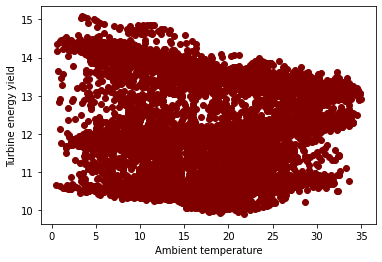

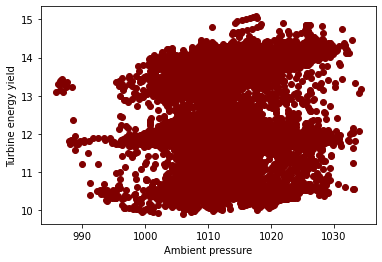

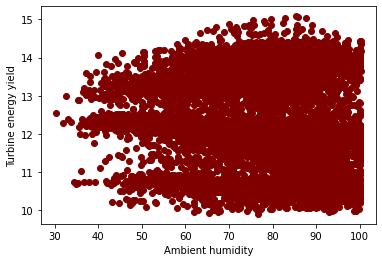

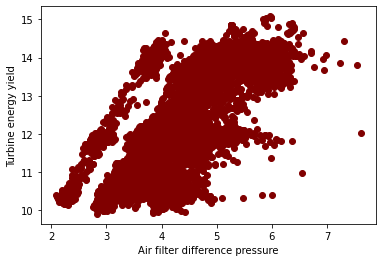

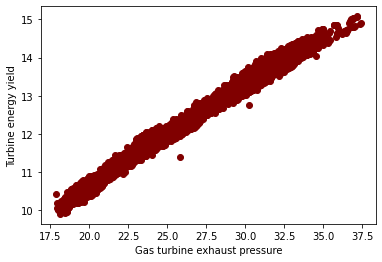

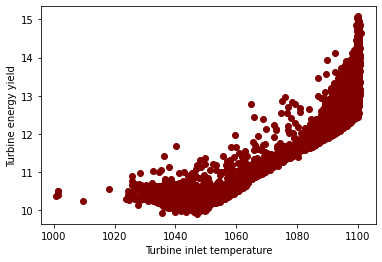

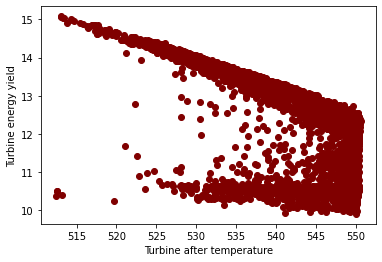

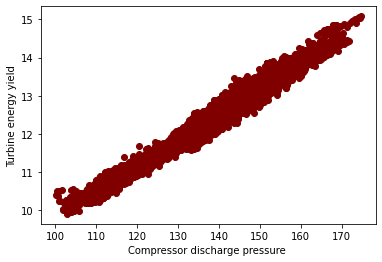

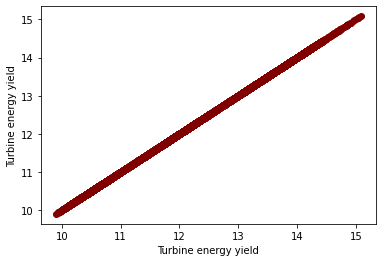

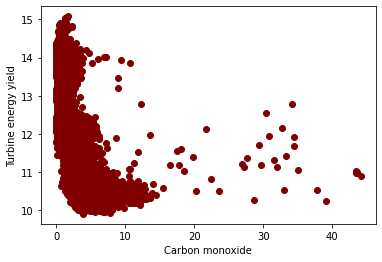

In [6]:
# Plotting the columns against the Energy Output.

for col in data.columns[:len(data.columns)-1]:
    plt.scatter(data[col], data["Turbine energy yield"], color="maroon")
    plt.ylabel("Turbine energy yield")
    plt.xlabel(col)
    plt.show()

# B. Fitting Our Model and Predicting Models

In [7]:
# Randomizing the rows.

X = np.random.permutation(data.index)
data = data.reindex(X)

In [8]:
X = data.drop('Turbine energy yield',axis=1)
y = data[['Turbine energy yield']]


In [9]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
X_norm = norm_func(X)

In [11]:
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size=0.2)

In [12]:
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['categorical_accuracy'])

In [28]:
model.fit(x_train, y_train, epochs=30, batch_size=10)

Epoch 1/30
1204/1204 [==============================] - 5s 4ms/step - loss: 12.1023 - categorical_accuracy: 1.0000
Epoch 2/30
1204/1204 [==============================] - 3s 2ms/step - loss: 12.1023 - categorical_accuracy: 1.0000A: 2s -
Epoch 3/30
1204/1204 [==============================] - 3s 2ms/step - loss: 12.1023 - categorical_accuracy: 1.0000
Epoch 4/30
1204/1204 [==============================] - 3s 2ms/step - loss: 12.1023 - categorical_accuracy: 1.0000
Epoch 5/30
1204/1204 [==============================] - 3s 2ms/step - loss: 12.1023 - categorical_accuracy: 1.0000
Epoch 6/30
1204/1204 [==============================] - 3s 2ms/step - loss: 12.1023 - categorical_accuracy: 1.0000
Epoch 7/30
1204/1204 [==============================] - 3s 2ms/step - loss: 12.1023 - categorical_accuracy: 1.0000
Epoch 8/30
1204/1204 [==============================] - 3s 2ms/step - loss: 12.1023 - categorical_accuracy: 1.0000
Epoch 9/30
1204/1204 [==============================] - 3s 2ms/step - los

In [15]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

376/376 [==============================] - 1s 2ms/step - loss: 12.1023 - categorical_accuracy: 1.0000
Accuracy: 100.00


## __4 - Conclusion__ 

In [24]:
predictions = model.predict(x_train)
predictions= pd.DataFrame(predictions)

In [27]:
predictions.head(50)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0
